Handle imbalanced classification problems
<br>
https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
h1b_17 = pd.read_excel('H-1B_Disclosure_Data_FY17.xlsx')
h1b_18 = pd.read_excel('H-1B_FY2018.xlsx')

In [3]:
print(h1b_17.shape)
print(h1b_17['VISA_CLASS'].unique())

(624650, 52)
[u'H-1B' u'E-3 Australian' u'H-1B1 Singapore' u'H-1B1 Chile']


We want to choose only the H-1B visa class.

In [4]:
h1b_17 = h1b_17[h1b_17['VISA_CLASS']=='H-1B']
h1b_18 = h1b_18[h1b_18['VISA_CLASS']=='H-1B']

We will use the 2017 to build a model and try to predict the 2018 data.
The column to be predicted is 'CASE_STATUS'.

In [28]:
h1b_18.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,...,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,I-200-14276-496918,CERTIFIED-WITHDRAWN,2014-10-08,2017-12-14,H-1B,2015-03-17,2018-03-16,"EXPICIENT, INC",NaN,26 CHESTNUT STREET,...,Y,N,Y,Y,NaN,UNION,UNION COUNTY,MA,07083,2014-10-14
1,I-200-14277-767454,CERTIFIED-WITHDRAWN,2014-10-04,2017-10-17,H-1B,2014-11-17,2017-11-16,BAYLOR COLLEGE OF MEDICINE,NaN,ONE BAYLOR PLAZA,...,N,N,NaN,NaN,NaN,HOUSTON,HARRIS,TX,77030,2014-10-08
2,I-200-14280-228909,CERTIFIED-WITHDRAWN,2014-10-07,2017-10-10,H-1B,2014-12-01,2017-11-30,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,NaN,77 MASSACHUSETTS AVENUE,...,N,N,NaN,NaN,NaN,CAMBRIDGE,MIDDLESEX,MA,02139,2014-10-10
3,I-200-14280-196484,WITHDRAWN,2014-10-09,2017-12-07,H-1B,2015-01-01,2017-12-31,"ETEK IT SERVICES, INC.",NaN,830 E HIGGINS RD,...,Y,N,Y,NaN,NaN,LAWRENCEVILLE,GWINNETT,GA,30044,NaT
4,I-200-13354-729924,CERTIFIED-WITHDRAWN,2014-11-25,2017-11-08,H-1B,2014-12-21,2017-12-20,MVP SERVICE CORP.,MVP HEALTH CARE,625 STATE STREET,...,N,N,NaN,NaN,NaN,TARRYTOWN,WESTCHESTER,NY,10591-5455,2014-12-02


Romove unnecessary columns

In [41]:
data_18 = h1b_18
drop_cols = ['CASE_NUMBER','CASE_SUBMITTED','DECISION_DATE','VISA_CLASS','EMPLOYMENT_START_DATE','EMPLOYMENT_END_DATE','EMPLOYER_NAME','EMPLOYER_ADDRESS','EMPLOYER_CITY','EMPLOYER_PROVINCE','EMPLOYER_COUNTRY','EMPLOYER_PHONE','EMPLOYER_PHONE_EXT','EMPLOYER_POSTAL_CODE','AGENT_ATTORNEY_NAME','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_STATE','NAICS_CODE','PW_SOURCE','PW_SOURCE_YEAR','PW_SOURCE_OTHER','EMPLOYER_BUSINESS_DBA','WORKSITE_POSTAL_CODE','WORKSITE_CITY','WORKSITE_COUNTY','PUBLIC_DISCLOSURE_LOCATION','ORIGINAL_CERT_DATE']
data_18 = data_18.drop(drop_cols,axis=1)

data_17 = h1b_17
drop_cols = ['CASE_NUMBER','CASE_SUBMITTED','DECISION_DATE','VISA_CLASS','EMPLOYMENT_START_DATE','EMPLOYMENT_END_DATE','EMPLOYER_NAME','EMPLOYER_ADDRESS','EMPLOYER_CITY','EMPLOYER_PROVINCE','EMPLOYER_COUNTRY','EMPLOYER_PHONE','EMPLOYER_PHONE_EXT','EMPLOYER_POSTAL_CODE','AGENT_ATTORNEY_NAME','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_STATE','NAICS_CODE','PW_SOURCE','PW_SOURCE_YEAR','PW_SOURCE_OTHER','EMPLOYER_BUSINESS_DBA','WORKSITE_POSTAL_CODE','WORKSITE_CITY','WORKSITE_COUNTY','PUBLIC_DISCLOSURE_LOCATION','ORIGINAL_CERT_DATE']
data_17 = data_17.drop(drop_cols,axis=1)

print(data_18.shape)
print(data_17.shape)
data_18.head()

(90815, 25)
(610304, 25)


,CASE_STATUS,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_CODE,SOC_NAME,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,...,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_STATE
0,CERTIFIED-WITHDRAWN,MA,Y,COMPUTER SYSTEMS ANALYST,15-1121,COMPUTER SYSTEMS ANALYSTS,1,0,1,0,...,Year,Level II,90000.00,0.0,Year,Y,N,Y,Y,MA
1,CERTIFIED-WITHDRAWN,TX,N,POSTDOCTORAL ASSOCIATE/FELLOW,19-1021,BIOCHEMISTS AND BIOPHYSICISTS,1,1,0,0,...,Year,Level I,48000.00,0.0,Year,N,N,NaN,NaN,TX
2,CERTIFIED-WITHDRAWN,MA,N,RESEARCH SCIENTIST,19-2032,MATERIALS SCIENTISTS,1,1,0,0,...,Year,Level IV,79500.00,0.0,Year,N,N,NaN,NaN,MA
3,WITHDRAWN,IL,Y,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,1,0,1,0,...,Year,Level II,74630.00,0.0,Year,Y,N,Y,NaN,GA
4,CERTIFIED-WITHDRAWN,NY,Y,NETWORK ENGINEER,15-1133,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",1,0,0,0,...,Year,Level II,92000.09,0.0,Year,N,N,NaN,NaN,NY


Remove 'WITHDRAWN' cases since we are not interested in them. Also, replace "CERTIFIED-WITHDRAWN" with "CERTIFIED" since we are interested if an application is approved. 

In [42]:
data_18 = data_18.loc[data_18['CASE_STATUS']!='WITHDRAWN',:]
data_18['CASE_STATUS'].replace(to_replace = "CERTIFIED-WITHDRAWN",value="CERTIFIED",inplace=True)

data_17 = data_17.loc[data_17['CASE_STATUS']!='WITHDRAWN',:]
data_17['CASE_STATUS'].replace(to_replace = "CERTIFIED-WITHDRAWN",value="CERTIFIED",inplace=True)

data_18.head()

,CASE_STATUS,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_CODE,SOC_NAME,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,...,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_STATE
0,CERTIFIED,MA,Y,COMPUTER SYSTEMS ANALYST,15-1121,COMPUTER SYSTEMS ANALYSTS,1,0,1,0,...,Year,Level II,90000.00,0.0,Year,Y,N,Y,Y,MA
1,CERTIFIED,TX,N,POSTDOCTORAL ASSOCIATE/FELLOW,19-1021,BIOCHEMISTS AND BIOPHYSICISTS,1,1,0,0,...,Year,Level I,48000.00,0.0,Year,N,N,NaN,NaN,TX
2,CERTIFIED,MA,N,RESEARCH SCIENTIST,19-2032,MATERIALS SCIENTISTS,1,1,0,0,...,Year,Level IV,79500.00,0.0,Year,N,N,NaN,NaN,MA
4,CERTIFIED,NY,Y,NETWORK ENGINEER,15-1133,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",1,0,0,0,...,Year,Level II,92000.09,0.0,Year,N,N,NaN,NaN,NY
5,CERTIFIED,VA,N,SOFTWARE ENGINEER,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",1,0,1,0,...,Year,Level II,88000.00,0.0,Year,N,N,NaN,Y,VA


In [43]:
print(data_18['CASE_STATUS'].value_counts())
print(data_17['CASE_STATUS'].value_counts())

CERTIFIED    86459
DENIED        1267
Name: CASE_STATUS, dtype: int64
CERTIFIED    582501
DENIED         7481
Name: CASE_STATUS, dtype: int64


In [45]:
#Separate 'CERTIFIED' and 'DENIED' cases
certified_18 = data_18.loc[data_18['CASE_STATUS']=='CERTIFIED',:]
denied_18 = data_18.loc[data_18['CASE_STATUS']=='DENIED',:]

certified_17 = data_17.loc[data_17['CASE_STATUS']=='CERTIFIED',:]
denied_17 = data_17.loc[data_17['CASE_STATUS']=='DENIED',:]

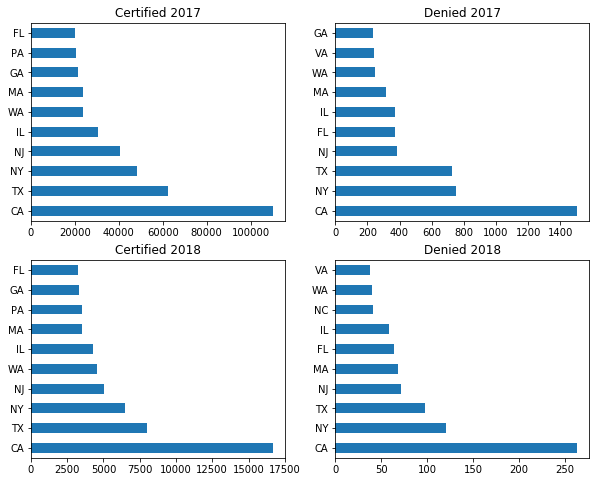

In [50]:
%matplotlib inline
plt.subplot(2, 2, 1)
plt.title('Certified 2017')
certified_17['WORKSITE_STATE'].value_counts().head(10).plot.barh(figsize=(10,8))
plt.subplot(2, 2, 2)
plt.title('Denied 2017')
denied_17['WORKSITE_STATE'].value_counts().head(10).plot.barh(figsize=(10, 8))

plt.subplot(2, 2, 3)
plt.title('Certified 2018')
certified_18['WORKSITE_STATE'].value_counts().head(10).plot.barh(figsize=(10,8))
plt.subplot(2, 2, 4)
plt.title('Denied 2018')
denied_18['WORKSITE_STATE'].value_counts().head(10).plot.barh(figsize=(10, 8))

    total  certified
CA  16916      16653
TX   8102       8004
NY   6587       6467
NJ   5083       5011
WA   4596       4556
IL   4325       4267
MA   3616       3548
PA   3523       3495
GA   3311       3281
FL   3307       3243
MI   2985       2953
NC   2817       2776
VA   2728       2690
OH   2279       2251
MD   1606       1579
MN   1546       1529
AZ   1256       1244
MO   1204       1194
CT   1155       1143
CO   1019        986
TN    991        979
WI    943        932
IN    870        859
OR    664        653
DE    618        614
DC    569        560
IA    440        437
AR    407        403
UT    385        361
KS    371        367
SC    371        366
KY    364        359
NE    308        302
RI    267        263
NH    244        241
LA    224        222
AL    214        213
NV    208        202
OK    192        191
NM    188        175
ID    119        119
MS     99         96
ME     92         91
ND     90         89
MP     88         69
HI     81         79
WV     69    

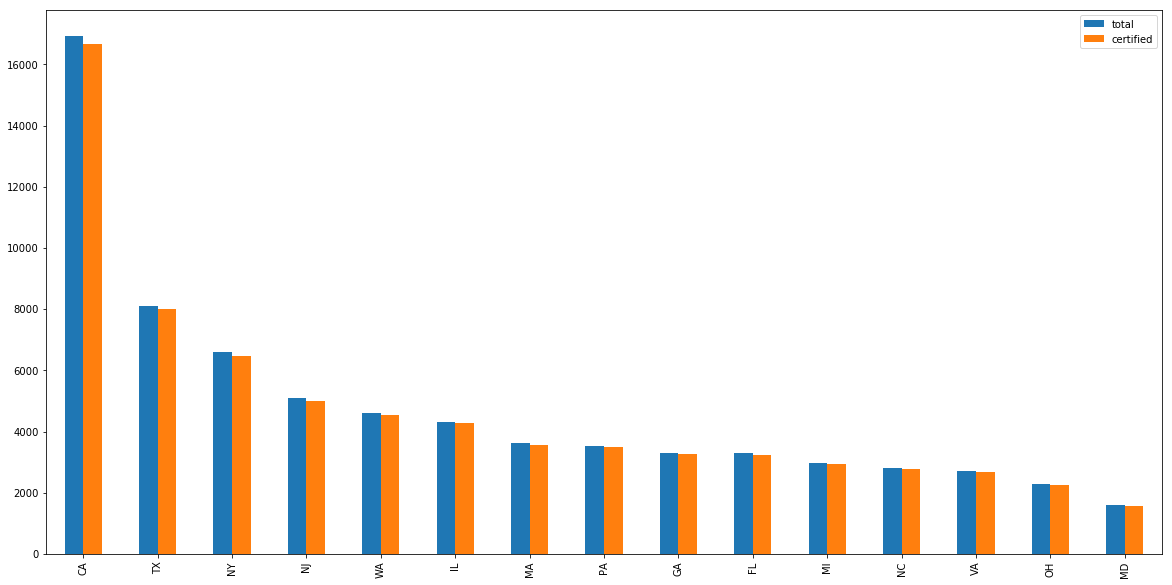

In [34]:
total_state = data_18['WORKSITE_STATE'].value_counts()
certified_state = certified_18['WORKSITE_STATE'].value_counts()
denied_state = denied_18['WORKSITE_STATE'].value_counts()
percentage = certified_state/total_state*100

worksite_state = pd.concat([total_state,certified_state],axis=1)
worksite_state.columns = ['total','certified']
worksite_state = worksite_state.sort_values(['total'],ascending=False)
print(worksite_state)

%matplotlib inline
worksite_state.head(15).plot.bar(figsize=(20,10))


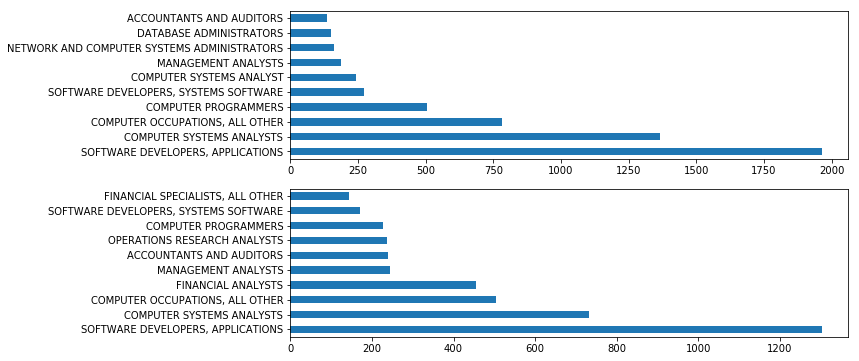

In [35]:
%matplotlib inline
plt.subplot(2, 1, 1)
certified_18.loc[certified_18['WORKSITE_STATE']=='TX','SOC_NAME'].value_counts().head(10).plot.barh(figsize=(10, 6))
plt.subplot(2, 1, 2)
certified_18.loc[certified_18['WORKSITE_STATE']=='NY','SOC_NAME'].value_counts().head(10).plot.barh(figsize=(10, 6))

In [86]:
## fix null values in "JOB_TITLE" 
data_17["JOB_TITLE"] = data_17["JOB_TITLE"].fillna("NA")

print(data_17["JOB_TITLE"].isnull().sum())
print(data_18["JOB_TITLE"].isnull().sum())



0
0


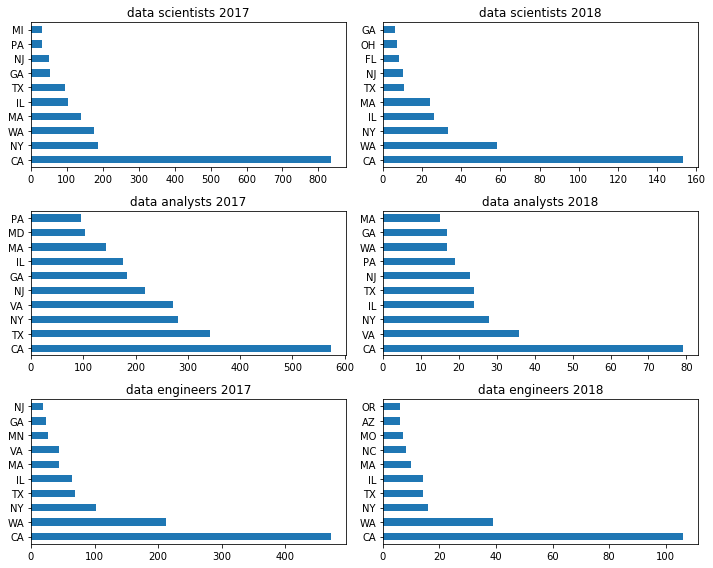

In [87]:
data_scientists_18 = data_18[data_18["JOB_TITLE"].str.contains('data scientist',case=False)]
data_analysts_18 = data_18[data_18["JOB_TITLE"].str.contains('data analyst',case=False)]
data_engineers_18 = data_18[data_18["JOB_TITLE"].str.contains('data engineer',case=False)]

data_scientists_17 = data_17[data_17["JOB_TITLE"].str.contains('data scientist',case=False)]
data_analysts_17 = data_17[data_17["JOB_TITLE"].str.contains('data analyst',case=False)]
data_engineers_17 = data_17[data_17["JOB_TITLE"].str.contains('data engineer',case=False)]

plt.subplot(3,2,1)
plt.title('data scientists 2017')
plt.tight_layout()
data_scientists_17["WORKSITE_STATE"].value_counts().head(10).plot.barh(figsize=(10, 8))

plt.subplot(3,2,3)
plt.title('data analysts 2017')
data_analysts_17["WORKSITE_STATE"].value_counts().head(10).plot.barh(figsize=(10, 8))

plt.subplot(3,2,5)
plt.title('data engineers 2017')
data_engineers_17["WORKSITE_STATE"].value_counts().head(10).plot.barh(figsize=(10, 8))

plt.subplot(3,2,2)
plt.title('data scientists 2018')
plt.tight_layout()
data_scientists["WORKSITE_STATE"].value_counts().head(10).plot.barh(figsize=(10, 8))

plt.subplot(3,2,4)
plt.title('data analysts 2018')
data_analysts["WORKSITE_STATE"].value_counts().head(10).plot.barh(figsize=(10, 8))

plt.subplot(3,2,6)
plt.title('data engineers 2018')
data_engineers["WORKSITE_STATE"].value_counts().head(10).plot.barh(figsize=(10, 8))



In [37]:
analysts = data_18[data_18["JOB_TITLE"].str.contains('analysts',case=False)]
analysts.head()

,CASE_STATUS,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,JOB_TITLE,SOC_CODE,SOC_NAME,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,...,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_STATE
1769,CERTIFIED,TX,N,COMPUTER SYSTEMS ANALYSTS,15-1121,COMPUTER SYSTEMS ANALYSTS,1,0,0,0,...,Year,Level I,68411.0,0.0,Year,Y,N,Y,Y,TX
1905,CERTIFIED,TX,N,COMPUTER SYSTEMS ANALYSTS,15-1121,COMPUTER SYSTEMS ANALYSTS,1,0,0,0,...,Year,Level I,62566.0,0.0,Year,Y,N,Y,Y,TX
2007,CERTIFIED,NJ,Y,SYSTEMS ANALYSTS,15-1121,COMPUTER SYSTEMS ANALYSTS,1,1,0,0,...,Year,Level I,60000.0,0.0,Year,Y,N,Y,NaN,AZ
2636,CERTIFIED,TX,N,COMPUTER SYSTEMS ANALYSTS,15-1121,COMPUTER SYSTEMS ANALYSTS,1,1,0,0,...,Year,Level I,62000.0,0.0,Year,Y,N,Y,Y,TX
2677,CERTIFIED,TX,N,COMPUTER SYSTEMS ANALYSTS,15-1121,COMPUTER SYSTEMS ANALYSTS,1,1,0,0,...,Year,Level I,62000.0,0.0,Year,Y,N,Y,Y,FL


In [38]:
data_18[['PREVAILING_WAGE','WAGE_RATE_OF_PAY_FROM','WAGE_RATE_OF_PAY_TO']].head()

,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO
0,76211.0,90000.00,0.0
1,42578.0,48000.00,0.0
2,67912.0,79500.00,0.0
4,91374.0,92000.09,0.0
5,87422.0,88000.00,0.0


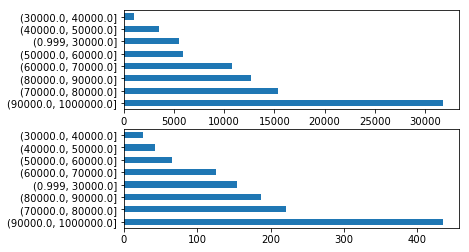

In [39]:
plt.subplot(2,1,1)
certified_18['PREVAILING_WAGE'].value_counts(bins=[1,30000,40000,50000,60000,70000,80000,90000,1000000]).plot.barh()
plt.subplot(2,1,2)
denied_18['PREVAILING_WAGE'].value_counts(bins=[1,30000,40000,50000,60000,70000,80000,90000,1000000]).plot.barh()

**Potentially useful features**
<br>
'SUPPORT_H1B', 'FULL_TIME_POSITION',
<br>
**To be removed:**
'WILLFUL_VIOLATOR' (there's only "N" value)